In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cleaned_df.csv')

## Exploring Data 

In [3]:
df.head()

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
0,AL,Saraland,Scott Dr,36571.0,4.0,2.0,1614.0,148.636927,0.3805,240600.0,1599.0,30.819534,-88.095960,239900.0
1,AL,Robertsdale,Cowpen Creek Rd,36567.0,3.0,2.0,1800.0,144.388889,3.2000,NaN,NaN,30.590004,-87.580376,259900.0
2,AL,Gulf Shores,Spinnaker Dr #201,36542.0,2.0,2.0,1250.0,274.000000,NaN,NaN,NaN,30.284956,-87.747920,342500.0
3,AL,Chelsea,Mallet Way,35043.0,3.0,3.0,2224.0,150.629496,0.2600,336200.0,1932.0,33.357986,-86.608700,335000.0
4,AL,Huntsville,Turtlebrook Ct,35811.0,3.0,2.0,1225.0,204.081633,NaN,222700.0,1679.0,34.775517,-86.440700,250000.0


In [4]:
df.sample(5)

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
9642,MI,Macomb,Willow Springs Dr,48042.0,3.0,4.0,3586.0,125.460123,0.270000,443100.0,2901.0,42.677635,-82.92957,449900.0
4123,FL,Punta Gorda,Alicante Dr,33955.0,4.0,2.0,1829.0,209.945325,0.216713,NaN,2094.0,26.799230,-82.02477,383990.0
11330,MO,Joplin,-1119 S Saint Louis Ave,64801.0,NaN,NaN,1900.0,92.105263,0.160000,NaN,1236.0,37.078697,-94.49478,175000.0
8230,ME,Waterford,Valley Road,4088.0,6.0,4.0,2500.0,95.600000,2.100000,NaN,NaN,44.231796,-70.76765,239000.0
15843,OH,Dayton,Coventry Ct,45440.0,4.0,4.0,1940.0,170.051546,0.178300,337400.0,2225.0,39.689415,-84.09717,329900.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22681 entries, 0 to 22680
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           22681 non-null  object 
 1   City            22681 non-null  object 
 2   Street          22681 non-null  object 
 3   Zipcode         22681 non-null  float64
 4   Bedroom         22667 non-null  float64
 5   Bathroom        22647 non-null  float64
 6   Area            22681 non-null  float64
 7   PPSq            22681 non-null  float64
 8   LotArea         21779 non-null  float64
 9   MarketEstimate  15445 non-null  float64
 10  RentEstimate    16705 non-null  float64
 11  Latitude        22681 non-null  float64
 12  Longitude       22681 non-null  float64
 13  ListedPrice     22681 non-null  float64
dtypes: float64(11), object(3)
memory usage: 2.4+ MB


In [6]:
# using lambda to show whole numbers and not scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
print(df.describe())

        Zipcode   Bedroom  Bathroom      Area      PPSq   LotArea  \
count 22681.000 22667.000 22647.000 22681.000 22681.000 21779.000   
mean  50023.455     3.393     2.423  2128.138   222.642     2.355   
std   29570.312     1.051     1.158  1577.513   202.812    16.128   
min    1002.000     0.000     0.000   120.000     1.926     0.000   
25%   25419.000     3.000     2.000  1400.000   132.730     0.173   
50%   50703.000     3.000     2.000  1849.000   184.122     0.299   
75%   74134.000     4.000     3.000  2466.000   257.118     0.930   
max   99950.000    21.000    25.000 99990.000  6117.071   800.000   

       MarketEstimate  RentEstimate  Latitude  Longitude  ListedPrice  
count       15445.000     16705.000 22681.000  22681.000    22681.000  
mean       487038.310      2624.699    39.752    -92.299   532439.911  
std       1155985.719      4029.615     5.695     16.867  1574921.807  
min         15700.000       100.000    25.450   -161.773     4888.000  
25%        230600.

In [7]:
pd.reset_option('display.float_format')
#resetting lambda from above

In [8]:
df.isnull().sum()

State                0
City                 0
Street               0
Zipcode              0
Bedroom             14
Bathroom            34
Area                 0
PPSq                 0
LotArea            902
MarketEstimate    7236
RentEstimate      5976
Latitude             0
Longitude            0
ListedPrice          0
dtype: int64

In [9]:
#replacing null values

df['Bedroom'] = df['Bedroom'].fillna('Unknown')
df['Bathroom'] = df['Bathroom'].fillna('Unknown')
df['LotArea'] = df['LotArea'].fillna('Unknown')
df['MarketEstimate'] = df['MarketEstimate'].fillna('Currently Unavailable')
df['RentEstimate'] = df['RentEstimate'].fillna('Currently Unavailable')

In [10]:
df.isnull().sum()

State             0
City              0
Street            0
Zipcode           0
Bedroom           0
Bathroom          0
Area              0
PPSq              0
LotArea           0
MarketEstimate    0
RentEstimate      0
Latitude          0
Longitude         0
ListedPrice       0
dtype: int64

In [11]:
print(f'In the dataset there are {df.shape[0]} rows and there are {df.shape[1]} columns.')

In the dataset there are 22681 rows and there are 14 columns.


## Graphs

### PPSq = Price per Square Foot
#### The graph below is showing the 5 most expensive and cheapest states to live by price per square foot

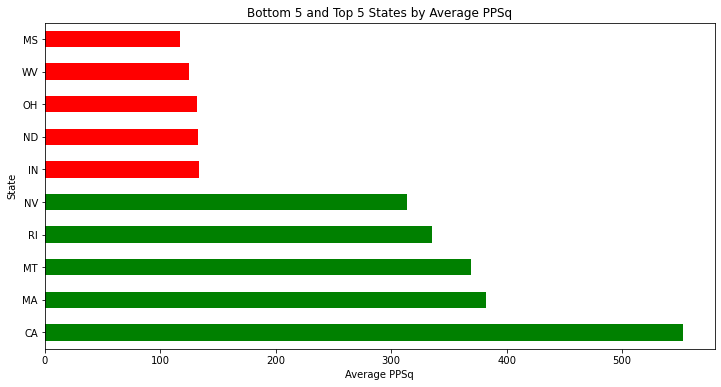

In [12]:
# Group by 'State' and calculate the average PPSq
average_ppsq_by_state = df.groupby('State')['PPSq'].mean()

# Sort the states by average PPSq in descending order
ppsq_bystate = average_ppsq_by_state.sort_values(ascending=False)

# Select the top 5 and bottom 5 states
top_states = ppsq_bystate.head(5)
bottom_states = ppsq_bystate.tail(5)

# Concatenate the DataFrames
combined_states = pd.concat([top_states, bottom_states])

# Visualize the results in a single horizontal bar chart
plt.figure(figsize=(12, 6))

combined_states.plot(kind='barh', color=['green' if state in top_states.index else 'red' for state in combined_states.index])
plt.title('Bottom 5 and Top 5 States by Average PPSq')
plt.xlabel('Average PPSq')
plt.ylabel('State')

plt.show()
#Hawaii is not in the dataset

In [13]:
print(top_states)

State
CA    552.408500
MA    382.474794
MT    369.468924
RI    335.263794
NV    313.218068
Name: PPSq, dtype: float64


In [14]:
print(ppsq_bystate)

State
CA    552.408500
MA    382.474794
MT    369.468924
RI    335.263794
NV    313.218068
CO    297.639494
FL    295.354302
AZ    291.461719
WA    291.332956
NH    287.138971
OR    284.484150
VT    282.197183
ID    282.096220
ME    266.647282
NJ    262.626703
UT    260.988102
CT    259.414954
WY    251.469179
DE    245.602403
AK    236.929992
MD    230.119307
NM    219.110510
TN    210.974277
NY    209.809140
SD    200.568302
GA    197.639240
NC    196.302124
WI    194.473876
MN    190.942512
VA    185.443532
SC    182.363321
IA    173.726314
LA    162.285691
AR    161.723613
PA    161.046672
TX    160.019727
NE    159.326276
MI    158.680117
KS    147.354990
MO    147.281703
IL    145.821781
OK    145.526068
AL    145.450376
KY    142.325657
IN    133.208038
ND    132.571654
OH    131.687175
WV    124.765139
MS    116.840756
Name: PPSq, dtype: float64


In [15]:
df.sample()

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice
13475,NJ,Jackson,Abbot Court,8527.0,3.0,2.0,1856.0,207.435345,0.14,392000.0,3399.0,40.10479,-74.2825,385000.0


In [16]:
#LotArea, Area, State
#first i need to convert LotArea to squarefeet
df['LotArea_sqft_unknowns'] = df['LotArea'] * 43560

In [17]:
# making new column for difference between LotArea_sqft and Area
# converting the values to numeric, ignoring non-numeric values
df['LotArea_sqft'] = pd.to_numeric(df['LotArea_sqft_unknowns'], errors='coerce')
df['Lot_Area_diff'] = df['LotArea_sqft'] - df['Area']

In [18]:
df.sample(10)

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,Latitude,Longitude,ListedPrice,LotArea_sqft_unknowns,LotArea_sqft,Lot_Area_diff
21437,WV,Worthington,Pine Bluff Rd,26591.0,3.0,2.0,1716.0,81.002331,0.48,Currently Unavailable,1494.0,39.430620,-80.291460,139000.0,20908.8,20908.8,19192.8
13522,NJ,Highlands,Seadrift Avenue,7732.0,3.0,2.0,1240.0,321.774194,0.04,411900.0,3300.0,40.403590,-73.991720,399000.0,1742.4,1742.4,502.4
11056,MO,Nixa,North Missouri Avenue,65714.0,3.0,2.0,1120.0,165.178571,0.34,175900.0,1300.0,37.045270,-93.291725,185000.0,14810.4,14810.4,13690.4
14371,NY,Staten Island,McKee Ave,10308.0,3.0,1.0,1390.0,395.539568,0.114784,527100.0,2949.0,40.544872,-74.141030,549800.0,5000.0,5000.0,3610.0
17736,SC,Summerville,Alwyn Blvd,29485.0,3.0,3.0,1608.0,230.099502,0.28,369600.0,2137.0,32.984340,-80.139250,370000.0,12196.8,12196.8,10588.8
4655,GA,Gray,Fortville Rd,31032.0,6.0,6.0,6398.0,117.208503,4.41,748300.0,4905.0,33.052795,-83.496895,749900.0,192099.6,192099.6,185701.6
4145,FL,Deltona,Fairhaven St,32725.0,4.0,2.0,2074.0,166.345227,0.23,344800.0,2299.0,28.910310,-81.261600,345000.0,10018.8,10018.8,7944.8
13175,NH,Thornton,Mountain River East Road UNIT 13,3285.0,3.0,3.0,1441.0,253.296322,Unknown,Currently Unavailable,Currently Unavailable,43.886080,-71.656690,365000.0,UnknownUnknownUnknownUnknownUnknownUnknownUnkn...,NaN,NaN
2382,CA,San Jose,Coleman Ave,95110.0,4.0,1.0,1845.0,704.065041,0.231726,1305200.0,5234.0,37.346450,-121.916030,1299000.0,10094.0,10094.0,8249.0
17716,RI,Providence,Pavilion Ave,2905.0,6.0,3.0,2592.0,211.805556,0.110009,Currently Unavailable,Currently Unavailable,41.795815,-71.409410,549000.0,4792.0,4792.0,2200.0


In [19]:
#new_variable = bed + bathroom
df['add_bedroom'] = pd.to_numeric(df['Bedroom'], errors='coerce')
df['add_bathroom'] = pd.to_numeric(df['Bathroom'], errors ='coerce')

In [20]:
df['bed_bath'] = df['add_bedroom'] + df['add_bathroom']

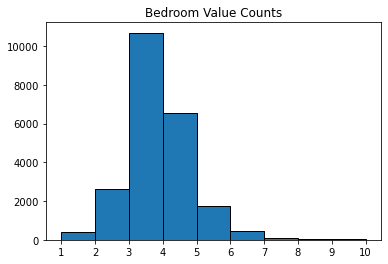

In [21]:
plt.hist(df['add_bedroom'],bins=np.arange(1, 11), edgecolor='black')
plt.xticks(np.arange(1, 11))
plt.title('Bedroom Value Counts')

plt.show()

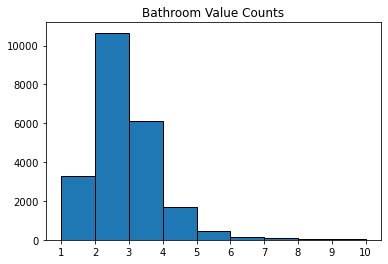

In [22]:
plt.hist(df['add_bathroom'],bins=np.arange(1, 11), edgecolor='black')
plt.xticks(np.arange(1, 11))
plt.title('Bathroom Value Counts')

plt.show()

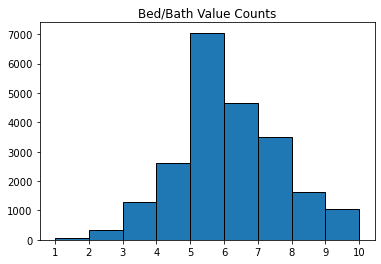

In [23]:
plt.hist(df['bed_bath'],bins=np.arange(1, 11), edgecolor='black')
plt.xticks(np.arange(1, 11))
plt.title('Bed/Bath Value Counts')

plt.show()

In [24]:
#according to quick google search, a comfortable area for a family of four is at least 2400 sqft
#work in ppsq and city/zipcode/state

In [25]:
#setting Area to binary to get familyhouse_area binary variable
df['familyhouse_Area'] = (df['Area'] >= 2400).astype(int)

In [26]:
#setting lot size sqft to binary. 13050 sqft is the typical size for family home
df['big_lot'] = (df['LotArea_sqft'] >= 13050).astype(int)

In [27]:
#setting affordable house to binary. average home price in usa was $415,000 in 2022
df['affordable'] = (df['ListedPrice'] <= 415000).astype(int)

In [28]:
#setting bed_bath to binary. average seems to be at least 5 total bed and bath
df['enough_bedbath'] = (df['bed_bath'] >= 5).astype(int)

In [29]:
df['Rent_in_prog'] = pd.to_numeric(df['RentEstimate'], errors='coerce')

In [30]:
df['Rent_affordability'] = (df['Rent_in_prog'] <= 1500).astype(int)

In [31]:
print('State')

State


In [32]:
#setting state density to binary. i feel like density of a state will be indicative of affordability. top 20 states are "1"
binary_mapping = {
    'NJ': 1,
    'RI': 1,
    'MA': 1,
    'CT': 1,
    'MD': 1,
    'DE': 1,
    'FL': 1,
    'NY': 1,
    'PA': 1,
    'OH': 1,
    'CA': 1,
    'IL': 1,
    'NC': 1,
    'VA': 1,
    'GA': 1,
    'IN': 1,
    'SC': 1,
    'MI': 1,
    'TN': 1,
    'NH': 1,
} 

In [33]:
df['dense_state'] = df['State'].map(binary_mapping)

In [34]:
df['dense_state'] = df['State'].map(binary_mapping).fillna(0)

In [35]:
df['dense_state'] = df['dense_state'].astype(int)

In [36]:
#del df['dense']
#del df['binary_state']

In [37]:
df.sample(5)

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,...,add_bedroom,add_bathroom,bed_bath,familyhouse_Area,big_lot,affordable,enough_bedbath,Rent_in_prog,Rent_affordability,dense_state
9066,MD,Laurel,Grant Ave,20723.0,4.0,3.0,2282.0,245.398773,0.172176,556700.0,...,4.0,3.0,7.0,0,0,0,1,2995.0,0,1
16466,OR,Oregon City,Vincent Dr,97045.0,3.0,2.0,1623.0,323.475046,0.25,Currently Unavailable,...,3.0,2.0,5.0,0,0,0,1,NaN,0,0
18144,SC,Conway,Allen Dr,29526.0,3.0,2.0,1565.0,223.641534,0.36,348100.0,...,3.0,2.0,5.0,0,1,1,1,1945.0,0,1
17213,PA,Moscow,Rubando Dr,18444.0,3.0,2.0,1240.0,100.806452,2.24,Currently Unavailable,...,3.0,2.0,5.0,0,1,1,1,NaN,0,1
22100,WI,Madison,Commercial Avenue,53704.0,2.0,1.0,1054.0,331.119545,0.12,368800.0,...,2.0,1.0,3.0,0,0,1,0,1900.0,0,0


In [38]:
#pip install seaborn

In [39]:
value_counts = df['familyhouse_Area'].value_counts()

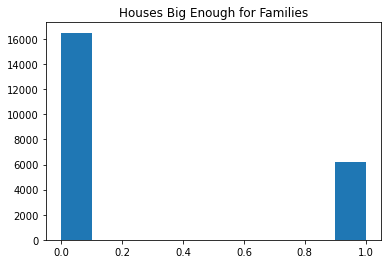

In [40]:
plt.hist(df['familyhouse_Area'])
plt.title('Houses Big Enough for Families')
plt.show()

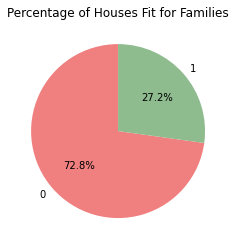

In [41]:
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'darkseagreen'])
plt.title('Percentage of Houses Fit for Families')
plt.show()

In [42]:
#examining larger cities by zipcode or city name

## Big Question: What factors (have the most significant impact on affordability in [State/City/Zipcode]

In [43]:
df.corr()

,Zipcode,Area,PPSq,Latitude,Longitude,ListedPrice,LotArea_sqft,Lot_Area_diff,add_bedroom,add_bathroom,bed_bath,familyhouse_Area,big_lot,affordable,enough_bedbath,Rent_in_prog,Rent_affordability,dense_state
Zipcode,1.000000,0.019716,0.027972,0.077532,-0.913899,0.014052,-0.029368,-0.029415,0.014285,0.025955,0.022175,0.041340,-0.138703,-0.056681,0.026858,-0.010764,0.045073,-0.587188
Area,0.019716,1.000000,0.183253,0.007575,-0.024973,0.582257,0.180868,0.178676,0.554455,0.735535,0.720311,0.553841,0.172577,-0.351342,0.276354,0.492351,-0.185238,-0.027166
PPSq,0.027972,0.183253,1.000000,0.053781,-0.103229,0.667013,0.241498,0.241175,0.037412,0.224021,0.148084,0.057332,0.033556,-0.396260,-0.034033,0.556763,-0.156275,0.068725
Latitude,0.077532,0.007575,0.053781,1.000000,-0.317057,0.018523,0.046951,0.046949,-0.025923,-0.055763,-0.045868,0.007156,0.101109,-0.055671,-0.106392,0.012978,-0.039159,-0.143897
Longitude,-0.913899,-0.024973,-0.103229,-0.317057,1.000000,-0.041316,0.012055,0.012110,-0.008439,-0.025488,-0.018902,-0.045290,0.096460,0.132521,-0.007848,-0.019587,0.005099,0.551468
ListedPrice,0.014052,0.582257,0.667013,0.018523,-0.041316,1.000000,0.273143,0.271942,0.254355,0.468714,0.410845,0.207250,0.086761,-0.237724,0.068544,0.774310,-0.089719,0.007229
LotArea_sqft,-0.029368,0.180868,0.241498,0.046951,0.012055,0.273143,1.000000,0.999998,0.056718,0.092539,0.083931,0.076339,0.135262,-0.079320,-0.008263,0.132772,-0.005202,-0.038502
Lot_Area_diff,-0.029415,0.178676,0.241175,0.046949,0.012110,0.271942,0.999998,1.000000,0.055492,0.090919,0.082345,0.075121,0.134945,-0.078559,-0.008877,0.131674,-0.004785,-0.038463
add_bedroom,0.014285,0.554455,0.037412,-0.025923,-0.008439,0.254355,0.056718,0.055492,1.000000,0.625465,0.890774,0.484551,0.075440,-0.303352,0.532456,0.264860,-0.217329,-0.014922
add_bathroom,0.025955,0.735535,0.224021,-0.055763,-0.025488,0.468714,0.092539,0.090919,0.625465,1.000000,0.911732,0.555364,0.121862,-0.434346,0.482944,0.490880,-0.261346,0.000966


## MLR - trying to predict price

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [45]:
# Define the features and target variable
X = df[['familyhouse_Area', 'big_lot', 'Rent_affordability', 'enough_bedbath', 'dense_state']]
y = df['ListedPrice']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
regressor = LinearRegression()
regressor.fit(X_train.values, y_train)

LinearRegression()

In [48]:
print(f"Coefficient: {regressor.coef_}")

Coefficient: [ 662212.72904507  171600.68497293 -218837.998361     13260.10023183
   32556.02656965]


In [49]:
print(f"Intercept: {regressor.intercept_}")

Intercept: 277799.62170137104


In [50]:
from sklearn.metrics import r2_score
import math

## Predicting ListedPrice

In [51]:
y_pred=regressor.predict(X_test.values)

In [52]:
#X = df[['familyhouse_Area', 'big_lot', 'Rent_affordabilty', 'enough_bedbath', 'dense_state']]

In [53]:
df.sample(5)

,State,City,Street,Zipcode,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,...,add_bedroom,add_bathroom,bed_bath,familyhouse_Area,big_lot,affordable,enough_bedbath,Rent_in_prog,Rent_affordability,dense_state
828,AK,Palmer,E Mountain Heather Way,99645.0,3.0,2.0,1250.0,300.000000,0.19,374800.0,...,3.0,2.0,5.0,0,0,1,1,2400.0,0,0
1582,AR,Jonesboro,W Monroe Ave,72401.0,3.0,1.0,1361.0,63.923586,0.15,Currently Unavailable,...,3.0,1.0,4.0,0,0,1,0,1374.0,1,0
18779,TN,Crossville,Plateau Rd,38571.0,3.0,2.0,1691.0,162.625665,0.6,Currently Unavailable,...,3.0,2.0,5.0,0,1,1,1,NaN,0,1
16490,OR,Grants Pass,W Jones Creek Rd,97526.0,7.0,2.0,2088.0,215.517241,1.389991,Currently Unavailable,...,7.0,2.0,9.0,0,1,0,1,NaN,0,0
11627,MT,Missoula,Sherwood St #10,59802.0,2.0,1.0,728.0,27.472527,Unknown,80900.0,...,2.0,1.0,3.0,0,0,1,0,259.0,1,0


### Sufficient for family house (area), big lot, rent is affordable,  enough bed/bath, not dense state)

In [54]:
regressor.predict([[1,1,1,1,0]])

array([906035.13759019])

#### (Above) The predicted listed price of the house would be $906,035

### Insufficient for family house (area), small lot, rent is not affordable, not enough bed/bath, dense state

In [55]:
regressor.predict([[0,0,0,0,1]])

array([310355.64827102])

#### (Above) The predicted listed price of the house would be $310,355

### Insufficient for family house (area), small lot, rent is not affordable, not enough bed/bath, not dense state

In [56]:
regressor.predict([[0,0,0,0,0]])

array([277799.62170137])

#### (Above) The predicted listed price of the house would be $277,799